<a href="https://colab.research.google.com/github/tadanur/Python-Assignments/blob/main/DAwPy_S8_(Handling_with_Outliers)_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 08</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [HANDLING WITH OUTLIERS](#1)
* [CATCHING & DETECTING OUTLIERS](#2)
* [REMOVING THE OUTLIERS](#3)    
* [LIMITATION & TRANSFORMATION OF THE OUTLIERS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### What is Outlier? [Source](https://statisticsbyjim.com/basics/remove-outliers/#:~:text=Outliers%20are%20unusual%20values%20in,what%20to%20do%20with%20them.)

In general, <b>``Outliers``</b> are **unusual values** in your dataset, and they can **distort statistical analyses and violate their assumptions**. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are.

### Most common causes of outliers on a data set [Source](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561):

- Data entry errors (human errors)
- Measurement errors (instrument errors)
- Experimental errors (data extraction or experiment planning/executing errors)
- Intentional (dummy outliers made to test detection methods)
- Data processing errors (data manipulation or data set unintended mutations)
- Sampling errors (extracting or mixing data from wrong or various sources)
- Natural (not an error, novelties in data) 

**HANDLING WITH OUTLIERS**

*   Removing the outliers.
*   Limitation the outliers (winsorize): Genelde datayi manipule eden bi yontem, cok tavsiye edilmez.
* Data Transformation (log, square root, exponentiating): If you apply the same thing to all the data values, you don't change the relationship between them. Olceklendirme gibi..
* Replacing outliers (mean, median, mode): Outlierlari missing valueya cevirip fill edersin
* Valuing outliers (valid reason for the outlier to exist): Bazen de outlier olmasinin gecerli bi sebebi vardir ve keep etmek istersin.
* Entry error ise manually duzeltilebilir. If you can't fix it, at gitsin.
* Calistiginiz population disinda bir deger. Remove edilebilir.
* Ancak calistiginiz alanda naturally olabilecek bi degerse, remove etmeyin. Mesela healthcarede cok unexpected bi test degeri cikti, hastalik dolayisiyla cikmis olabilir. Bu tarz datalar atilmaz..




### Guideline for Handling Outliers [Source 01](https://statisticsbyjim.com/basics/remove-outliers/#:~:text=Outliers%20are%20unusual%20values%20in,what%20to%20do%20with%20them.) & [Source 02](https://www.researchgate.net/publication/258174106_Best-Practice_Recommendations_for_Defining_Identifying_and_Handling_Outliers)

- A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
- Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
- A natural part of the population you are studying, you should not remove it.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Catching and Detecting Outliers</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [6]:
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df.select_dtypes(include="number")

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


**info about dataset**
- **carat   :**Carat weight of the diamond
- **depth % :**The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- **table % :**The width of the diamond's table expressed as a percentage of its average diameter
- **price   :**the price of the diamond
- **x       :**length mm
- **y       :**width mm
- **z       :**higth mm

### Detecting Outliers with Graphs

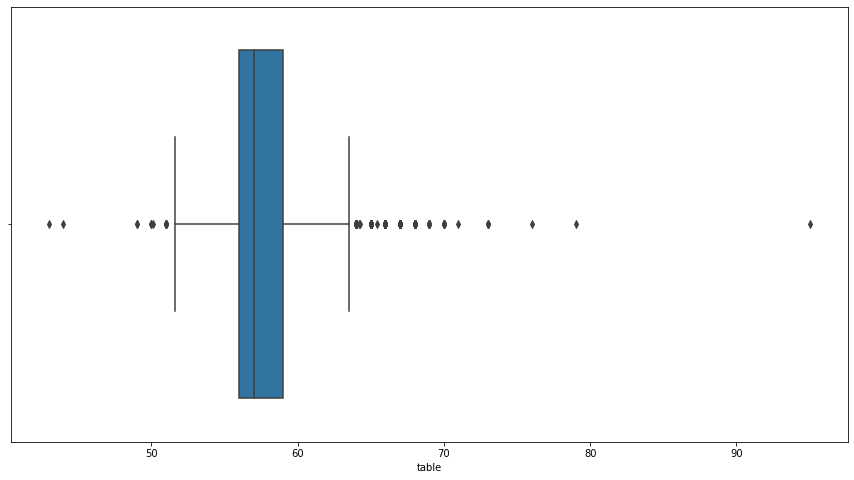

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df.table);

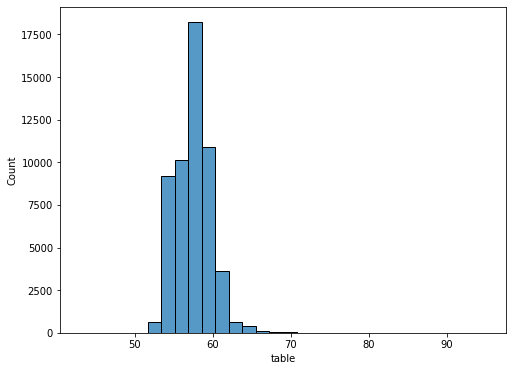

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(df.table, bins=30, kde=False);

In [12]:
df.table.sort_values()

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
         ... 
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, Length: 53940, dtype: float64

In [18]:
df.table.sort_values().tail(10)

23067    70.0
43705    70.0
44938    71.0
51391    73.0
49375    73.0
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, dtype: float64

In [20]:
tail_index = df.table.sort_values().tail(10).index
tail_index

Int64Index([23067, 43705, 44938, 51391, 49375, 52861, 52860, 51342, 50773,
            24932],
           dtype='int64')

In [21]:
df.loc[tail_index]

,carat,cut,color,clarity,depth,table,price,x,y,z
23067,1.51,Fair,E,SI1,58.4,70.0,11102,7.55,7.39,4.36
43705,0.67,Fair,I,VS2,57.2,70.0,1436,5.82,5.75,3.31
44938,0.68,Fair,G,SI1,58.0,71.0,1633,5.85,5.70,3.35
51391,0.71,Fair,D,VS2,55.6,73.0,2368,6.01,5.96,3.33
49375,0.70,Fair,H,VS1,62.0,73.0,2100,5.65,5.54,3.47
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
51342,0.79,Fair,G,SI1,65.3,76.0,2362,5.52,5.13,3.35
50773,0.81,Fair,F,SI2,68.8,79.0,2301,5.26,5.20,3.58
24932,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


### Detecting Outliers with Tukey's Fences | Tukey's Rule

**- First way** of specifying **``Q1 & Q3``** is using the **``.quantile()``** method

In [24]:
Q1 = df.table.quantile(0.25)

In [25]:
Q3 = df.table.quantile(0.75)

In [27]:
IQR = Q3 - Q1
IQR

3.0

**- Second way** of specifying **``Q1 & Q3``** is using the **``.describe()``** method

**PROCESS of DETECTING OUTLIERS**

In [28]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [29]:
Q1 = df.table.describe().loc["25%"]
Q3 = df.table.describe().loc["75%"]
IQR = Q3-Q1
IQR

3.0

In [31]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

lower_lim, upper_lim

(51.5, 63.5)

In [32]:
#  find the number of values lower or higher than limits

(df.table < lower_lim).sum()

16

In [33]:
(df.table > upper_lim).sum()

589

In [34]:
((df.table < lower_lim) | (df.table > upper_lim)).sum()

605

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Removing the Outliers</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [43]:
# indices of outlier table values

drop_index = df.loc[((df.table < lower_lim) | (df.table > upper_lim))].index
drop_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [42]:
# indices of non-outlier values

df.loc[~((df.table < lower_lim) | (df.table > upper_lim))].index

Int64Index([    0,     1,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            53930, 53931, 53932, 53933, 53934, 53935, 53936, 53937, 53938,
            53939],
           dtype='int64', length=53335)

In [45]:
# without the outlier values

df_cleaned = df.loc[~((df.table < lower_lim) | (df.table > upper_lim))]
df_cleaned

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [44]:
# dropping indices

df.drop(drop_index, axis=0)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


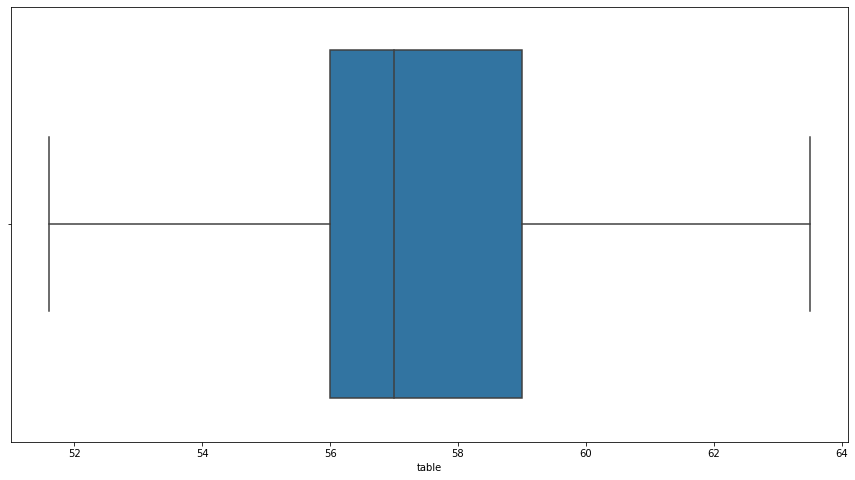

In [47]:
# outlierlar remove edildiktan sonraki hali

plt.figure(figsize=(15, 8))
sns.boxplot(x=df_cleaned.table)

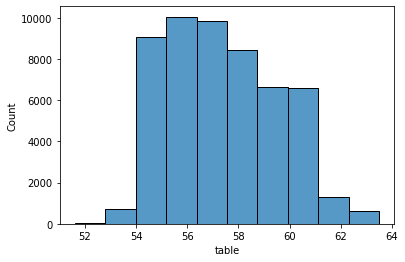

In [50]:
sns.histplot(df_cleaned.table, bins=10, kde=False)

In [53]:
# compared to the previous data, count, mean, min ve max degisti. 
#  quartilelar cok degismedi, cunku o degerlerde cok fazla data var. 50000 data genelde 56-57-59 araliklarinda..

df_cleaned.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [52]:
df.table.describe

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [58]:
compare = pd.DataFrame(df.table.describe().values, index = df.table.describe().index, columns = ["First"])
compare["Second"] = df_cleaned.table.describe().values
compare

,First,Second
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [69]:
# shorter version

pd.DataFrame([df.table.describe(), df_cleaned.table.describe()], index=["First", "Clean"]).T

,First,Clean
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Limitation & Transformation of the Outliers</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Limitation using ``.winsorize()`` method

With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively [Source 01](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0) & [Source 02](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html).

In [59]:
from scipy.stats.mstats import winsorize

In [60]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [63]:
# bastan 2%lik bir kismi whiskera yaklastir, sondan 5%lik bir kismi whiskera yaklastir
# this is just guessing!

winsorize(df.table, (0.02, 0.05))

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [66]:
# math yapacaksin. Toplam kac tane outlier oldugunu biliyorsun upper limit ve lower limit kullanarak
# yuzdeleri hesaplan gerek

# lower limitten daha kucuk olan outlierlarin yuzdesi 
a  = len(df.table[df.table<lower_lim])/len(df)
a

0.00029662588060808305

In [71]:
# upper limit outlierlarin yuzdesi
b = len(df.table[df.table>upper_lim])/len(df)
b

0.010919540229885057

In [72]:
#  mantikli version is below based on percentages

table_win = winsorize(df.table, (a, b))
table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

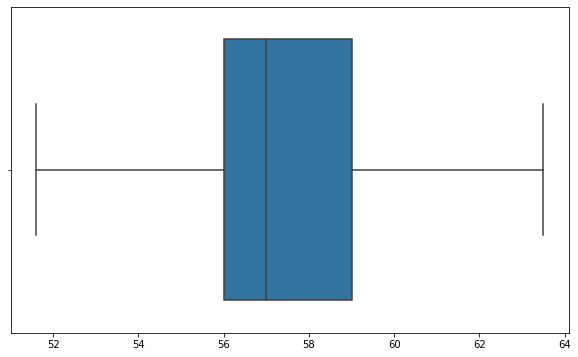

In [74]:
plt.figure(figsize = (10,6))
sns.boxplot(x=table_win);

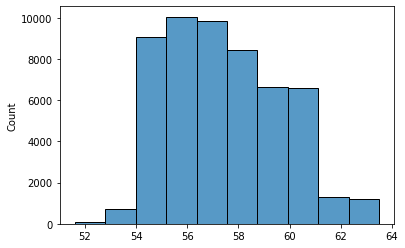

In [75]:
sns.histplot(table_win, bins=10, kde=False);

In [76]:
table_win_ser = pd.Series(table_win)
table_win_ser

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Length: 53940, dtype: float64

In [78]:
table_win_ser.describe()

count    53940.000000
mean        57.438591
std          2.161059
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
dtype: float64

In [79]:
# compare the description of data
pd.DataFrame([df.table.describe(), table_win_ser.describe()], index = ["first", "clean"]).T

,first,clean
count,53940.000000,53940.000000
mean,57.457184,57.438591
std,2.234491,2.161059
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [82]:
df.table.sort_values().head(20)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [84]:
#  51.6dan kucuk degerlerin hepsini 51.6ya cevirdi, sikistirdi. 

table_win_ser.sort_values().head(20)

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
24815    51.6
1515     51.6
5979     51.6
3238     51.6
47630    51.6
4150     51.6
7418     51.6
5144     52.0
33408    52.0
26431    52.0
dtype: float64

## Transformation using ``log()`` method

The **``Numpy.log()``** method lets you calculate the mathematical log of any number or array. The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.

The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e [Source 01](https://www.geeksforgeeks.org/numpy-log-python/#:~:text=The%20numpy.,is%20log%20in%20base%20e.) & [Source 02](https://numpy.org/doc/stable/reference/generated/numpy.log.html).

In [1]:
df

NameError: ignored

## Removing outliers after log() transformation

**first method to drop outliers**

**second method to drop outliers**

**third method to drop outliers**

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 08</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

____